#Normal Mode

In [674]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [675]:
%matplotlib inline

In [676]:
complaints = pd.read_csv("Consumer_Complaints.csv", low_memory=False)

In [677]:
complaints.index = pd.to_datetime(complaints.pop('Date received'), infer_datetime_format=True)
complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
Date received,,,,,,,,,,,,,
2015-05-22,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
2015-05-22,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2015-05-22,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2015-05-22,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NC,27615,Web,05/22/2015,Navy FCU,In progress,Yes,NaN
2015-05-22,1388470,Consumer loan,Installment loan,Managing the loan or lease,NaN,MA,1474,Phone,05/22/2015,Santander Bank US,In progress,Yes,NaN


In [678]:
complaints.tail()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
Date received,,,,,,,,,,,,,
2011-12-01,2352,Credit card,NaN,Credit determination,NaN,NY,13350,Web,12/05/2011,Capital One,Closed without relief,Yes,Yes
2011-12-01,2366,Credit card,NaN,Credit reporting,NaN,FL,33415,Referral,12/06/2011,Citibank,Closed without relief,Yes,Yes
2011-12-01,2368,Credit card,NaN,Credit line increase/decrease,NaN,FL,32792,Web,12/05/2011,Citibank,Closed without relief,Yes,No
2011-12-01,2371,Credit card,NaN,Other fee,NaN,HI,96813,Web,12/19/2011,Capital One,Closed without relief,Yes,No
2011-12-01,2374,Credit card,NaN,Payoff process,NaN,CA,94108,Phone,12/05/2011,Capital One,Closed without relief,Yes,Yes


In [679]:
complaints = complaints[['Complaint ID', 'Product', 'Issue', 'State', 'ZIP code', 'Submitted via', 'Company', 'Company response', 'Timely response?']]
complaints.head()

,Complaint ID,Product,Issue,State,ZIP code,Submitted via,Company,Company response,Timely response?
Date received,,,,,,,,,
2015-05-22,1388734,Mortgage,"Loan servicing, payments, escrow account",VA,22204,Web,"Green Tree Servicing, LLC",Closed with explanation,Yes
2015-05-22,1389303,Consumer loan,Taking out the loan or lease,MO,63304,Web,Ally Financial Inc.,In progress,Yes
2015-05-22,1389676,Consumer loan,Problems when you are unable to pay,FL,33414,Web,Ally Financial Inc.,In progress,Yes
2015-05-22,1388406,Mortgage,"Loan servicing, payments, escrow account",NC,27615,Web,Navy FCU,In progress,Yes
2015-05-22,1388470,Consumer loan,Managing the loan or lease,MA,1474,Phone,Santander Bank US,In progress,Yes


In [680]:
complaints['Complaint ID'].resample("M", how=["count"])[:-1].tail()


,count
Date received,
2014-12-31,11710
2015-01-31,12633
2015-02-28,12710
2015-03-31,14567
2015-04-30,13577


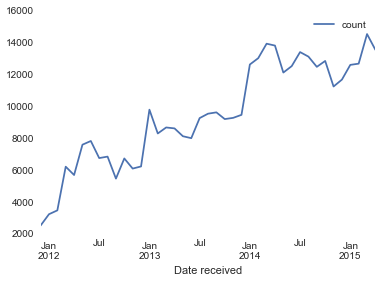

In [681]:
complaints['Complaint ID'].resample("M", how=["count"])[:-1].plot()

This plot shows the number of complaints increasing pretty steadily since they began collecting this data.  There are a few spikes which may be time when a large amount of people were opening/closing accounts--usually in January.

In [682]:
product_complaints = complaints['Complaint ID'].groupby(complaints['Product']).count()
product_complaints

Product
Bank account or service     45851
Consumer loan               13186
Credit card                 49772
Credit reporting            57299
Debt collection             65639
Money transfers              2249
Mortgage                   146533
Other financial service       212
Payday loan                  2540
Prepaid card                  699
Student loan                11873
Name: Complaint ID, dtype: int64

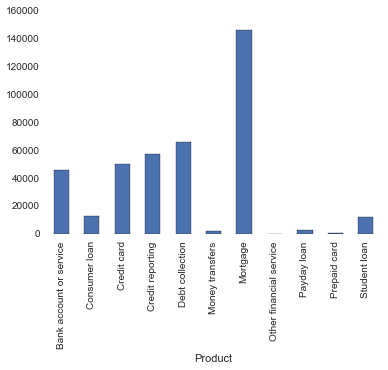

In [683]:
product_complaints.plot(kind='bar')

The product which yields the most complaints is a mortgage.

In [684]:
sorted_comps = complaints.groupby(complaints['Company']).count()
top_10 = sorted_comps.sort_index(by='Complaint ID')[::-1][0:10]
top_10['Complaint ID']

Company
Bank of America        46908
Wells Fargo            32992
JPMorgan Chase         26177
Experian               20190
Citibank               19578
Equifax                19572
Ocwen                  16864
TransUnion             15329
Capital One            12073
Nationstar Mortgage     9728
Name: Complaint ID, dtype: int64

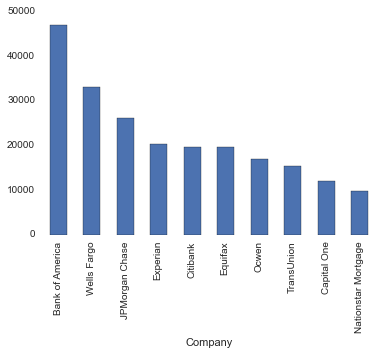

In [685]:
top_10['Complaint ID'].plot(kind='bar')

Bank of America has received the most complaints since the data collection began.

In [686]:
complaints_by_response = complaints['Complaint ID'].groupby(complaints['Company response']).count()
complaints_by_response

Company response
Closed                               9599
Closed with explanation            279287
Closed with monetary relief         28145
Closed with non-monetary relief     50502
Closed with relief                   5305
Closed without relief               17909
In progress                          3222
Untimely response                    1884
Name: Complaint ID, dtype: int64

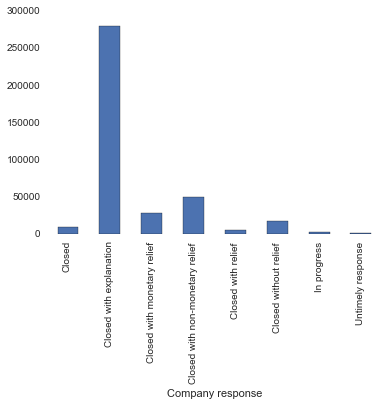

In [687]:
complaints_by_response.plot(kind='bar')

Nearly all of the complaints were closed with an explanation, however they also split it into whether or not it was closed with or without monetary relief. More were closed without monetary relief, not surprisingly.

In [688]:
days = ["Su", "M", "Tu", "W", "Th", "F", "Sa"]
complaints["Day of week"] = complaints.index.to_series().map(lambda d: d.weekday())
complaints.head()

,Complaint ID,Product,Issue,State,ZIP code,Submitted via,Company,Company response,Timely response?,Day of week
Date received,,,,,,,,,,
2015-05-22,1388734,Mortgage,"Loan servicing, payments, escrow account",VA,22204,Web,"Green Tree Servicing, LLC",Closed with explanation,Yes,4
2015-05-22,1389303,Consumer loan,Taking out the loan or lease,MO,63304,Web,Ally Financial Inc.,In progress,Yes,4
2015-05-22,1389676,Consumer loan,Problems when you are unable to pay,FL,33414,Web,Ally Financial Inc.,In progress,Yes,4
2015-05-22,1388406,Mortgage,"Loan servicing, payments, escrow account",NC,27615,Web,Navy FCU,In progress,Yes,4
2015-05-22,1388470,Consumer loan,Managing the loan or lease,MA,1474,Phone,Santander Bank US,In progress,Yes,4


In [689]:
sun_comps = complaints[complaints['Day of week'] == 0]
mon_comps = complaints[complaints['Day of week'] == 1]
tue_comps = complaints[complaints['Day of week'] == 2]
wed_comps = complaints[complaints['Day of week'] == 3]
thu_comps = complaints[complaints['Day of week'] == 4]
fri_comps = complaints[complaints['Day of week'] == 5]
sat_comps = complaints[complaints['Day of week'] == 6]

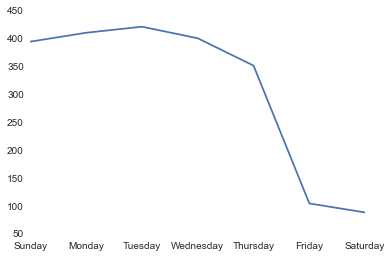

In [690]:
sun_mean = sun_comps['Complaint ID'].groupby(sun_comps.index).count().mean()
mon_mean = mon_comps['Complaint ID'].groupby(mon_comps.index).count().mean()
tue_mean = tue_comps['Complaint ID'].groupby(tue_comps.index).count().mean()
wed_mean = wed_comps['Complaint ID'].groupby(wed_comps.index).count().mean()
thu_mean = thu_comps['Complaint ID'].groupby(thu_comps.index).count().mean()
fri_mean = fri_comps['Complaint ID'].groupby(fri_comps.index).count().mean()
sat_mean = sat_comps['Complaint ID'].groupby(sat_comps.index).count().mean()
means= [sun_mean, mon_mean, tue_mean, wed_mean, thu_mean, fri_mean, sat_mean]
plt.plot(means)
plt.xticks(range(7), ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'))
plt.show()

Here are the mean number of complaints by day of the week. Most occur during the middle of the week however there are way more on sunday than there are on friday, which is somewhat surprising.

#Hard Mode

##Per Capita Complaints

In [691]:
state_pop = pd.read_csv("state_pop_data.csv")

In [692]:
state_pop = state_pop[['NAME', 'POPEST18PLUS2014', 'PCNT_POPEST18PLUS']]
state_pop.columns = ['State', 'Population', 'Percent Over 18']
state_pop.head()

,State,Population,Percent Over 18
0,US,245273438,76.9
1,AL,3741806,77.2
2,AK,550189,74.7
3,AZ,5109792,75.9
4,AR,2259350,76.2


In [693]:
state_pop.index = state_pop.pop('State')
state_pop.head()

,Population,Percent Over 18
State,,
US,245273438,76.9
AL,3741806,77.2
AK,550189,74.7
AZ,5109792,75.9
AR,2259350,76.2


In [694]:
comps_by_state = complaints.groupby(complaints['State']).count()

In [695]:
comps_by_state = comps_by_state[['Complaint ID', 'ZIP code']]
comps_by_state.columns = ['Complaints', 'ZIP']
comps_by_state.tail()

,Complaints,ZIP
State,,
VT,705,703
WA,8064,8055
WI,4473,4468
WV,997,996
WY,403,347


In [696]:
new_data = pd.concat([state_pop, comps_by_state], axis='index')
new_data.pop("ZIP")
new_data.pop("Percent Over 18")
new_data.head()

,Population,Complaints
AA,NaN,10
AE,NaN,147
AK,550189,478
AL,3741806,3842
AP,NaN,113


In [697]:
new_data.tail()

,Population,Complaints
VT,504976,705
WA,5458809,8064
WI,4457375,4473
WV,1470179,997
WY,445830,403


In [698]:
def find_per_capita(pop, comp):
    return ((comp / pop) * 100).round(5)

In [699]:
new_data["Per_capita_complaints"] = find_per_capita(new_data.pop('Population'), new_data.pop('Complaints'))
new_data.head(10)

,Per_capita_complaints
AA,NaN
AE,NaN
AK,0.08688
AL,0.10268
AP,NaN
AR,0.07392
AS,NaN
AZ,0.16983
CA,0.19765
CO,0.16528


##Outliers

In [700]:
comps_by_ZIP = complaints.groupby(complaints['ZIP code']).count()

In [701]:
comps_by_ZIP = comps_by_ZIP[['Complaint ID', 'Company']]
comps_by_ZIP.columns=['Complaints', 'Comp']
new_comps_by_ZIP = comps_by_ZIP[comps_by_ZIP['Complaints'] > 2].sort("Complaints")

In [702]:
mean = new_comps_by_ZIP.mean()
median = new_comps_by_ZIP.median()
st_dev = new_comps_by_ZIP.std()
mean, median, st_dev

(Complaints    23.855653
 Comp          23.855653
 dtype: float64, Complaints    13
 Comp          13
 dtype: float64, Complaints    29.351626
 Comp          29.351626
 dtype: float64)

In [703]:
one_stdv = mean + st_dev
two_stdv = mean + (2*st_dev)
one_stdv, two_stdv

(Complaints    53.207278
 Comp          53.207278
 dtype: float64, Complaints    82.558904
 Comp          82.558904
 dtype: float64)

In [704]:
comps_by_ZIP[comps_by_ZIP['Complaints'] > 41].sort("Complaints")[::-1].head()

,Complaints,Comp
ZIP code,,
48382,916,916
33071,617,617
76116,368,368
33173,364,364
20744,296,296


48382 and 33071 are way above the other ZIP codes, those areas are Commerce Township, Michigan and Coral Springs, FL. Coral Springs is really close to Fort Lauderdale, so that makes sense. But Commerce Township is a suburb of Detroit...not sure why that one has so many complaints.

##Nightmare Mode

In [705]:
import vincent
vincent.core.initialize_notebook()

In [706]:
import json
#Map the state names we have in our geometry to those in the
#per_capita dataframe, which has additional rows that aren't needed
with open('us_states.topo2.json', 'r') as f:
    get_id = json.load(f)

new_geoms = []
for geom in get_id['objects']['us_states.geo']['geometries']:
    geom['properties']['NAME']
    new_geoms.append(geom)

get_id['objects']['us_states.geo']['geometries'] = new_geoms

with open('us_states.topo2.json', 'w') as f:
    json.dump(get_id, f)

#get the state names and load them into a dataframe
geometries = get_id['objects']['us_states.geo']['geometries']
state_codes = [x['properties']['NAME'] for x in geometries]
state_df = pd.DataFrame({'NAME': state_codes}, dtype=str)
state_df = state_df.astype(str)

#Read into Dataframe, cast to string for consistency
df = new_data
new_data.index = new_data.index.astype(str)

state_df.head()

,NAME
0,AZ
1,AR
2,CA
3,CO
4,CT


In [707]:
new_data.head()

,Per_capita_complaints
AA,NaN
AE,NaN
AK,0.08688
AL,0.10268
AP,NaN


In [708]:
new_data.insert(1, 'idx', range(63))

In [709]:
new_data["NAME"] = new_data.index
new_data.index = new_data.pop('idx')

In [710]:
new_data.reindex_axis(sorted(new_data.columns), axis=1)
new_data.head()

,Per_capita_complaints,NAME
idx,,
0,NaN,AA
1,NaN,AE
2,0.08688,AK
3,0.10268,AL
4,NaN,AP


In [711]:
#Perform an inner join, pad NA's with data from nearest state
merged = pd.merge(df, state_df, on="NAME", how='inner')
merged = merged.fillna(method='pad')

In [712]:
merged.head()

,Per_capita_complaints,NAME
0,0.08688,AK
1,0.10268,AL
2,0.07392,AR
3,0.16983,AZ
4,0.19765,CA


In [713]:
cols = list(merged)
cols.insert(0, cols.pop(cols.index('NAME')))
merged = merged.ix[:, cols]
merged.head()

,NAME,Per_capita_complaints
0,AK,0.08688
1,AL,0.10268
2,AR,0.07392
3,AZ,0.16983
4,CA,0.19765


In [720]:
geo_data2 = [{'name': 'states',
             'url': state_topo,
             'feature': 'us_states.geo'}]
vis2 = vincent.Map(data=merged, geo_data=geo_data2, scale=900,
                  projection='albersUsa', data_bind='Per_capita_complaints', data_key='NAME',
                  map_key={'states': 'properties.NAME'}, brew='YlGnBu')
#Custom threshold scale
vis2.scales[0].type='threshold'
vis2.scales[0].domain = [0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28]
vis2.legend(title='Complaints Per Capita')
vis2

In [721]:
vis2.rebind(column='Per_capita_complaints', brew='RdPu')
vis2.scales[0].type='threshold'
vis2.scales[0].domain = [0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28]
vis2.legend(title='Complaints Per Capita')
vis2